<a href="https://colab.research.google.com/github/Akashkohli28/Chatbot/blob/main/Chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install langchain langchain-community langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.9/143.9 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 20.2 MB/s eta 0:00:00


In [2]:
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from typing import Annotated
from typing_extensions import TypedDict
from langchain.chat_models import ChatOpenAI

Define State


In [3]:
class State(TypedDict):
  messages: Annotated[list,add_messages]

Initialize StateGraph

In [4]:
graph_builder = StateGraph(State)

Initialize LLM

In [5]:
from google.colab import userdata
api_key = userdata.get('OPENAI_API_KEY')
llm = ChatOpenAI(  model="gpt-4o",api_key=api_key,temperature=0)

/tmp/ipython-input-5-3381312701.py:3: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  llm = ChatOpenAI(  model="gpt-4o",api_key=api_key,temperature=0)


Defining ChatBot function

In [6]:
def ChatBot(state:State):
  return {"messages":[llm.invoke(state["messages"])]}

Adding nodes and edges

In [7]:
graph_builder.add_node("ChatBot",ChatBot)
graph_builder.add_edge(START,"ChatBot")
graph_builder.add_edge("ChatBot",END)

In [8]:
graph = graph_builder.compile()


Displaying graph

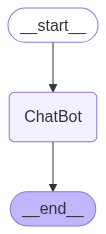

In [9]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [10]:
def stream_graph_updates(user_input:str):
  state = {"messages":[{"role":"user","content":user_input}]}
  for event in graph.stream(state):
    for value in event.values():
      print("Assistant:",value["messages"][-1]. content)



In [ ]:
while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break
        stream_graph_updates(user_input)
    except Exception as e:
        print(f"An error occurred: {e}")
        break


User: what is agentic ai
Assistant: Agentic AI refers to artificial intelligence systems that possess a degree of autonomy and decision-making capability, allowing them to act as agents in various environments. These systems can perceive their surroundings, make decisions based on their programming and learning, and take actions to achieve specific goals. The term "agentic" highlights the AI's ability to operate independently to some extent, rather than merely following pre-defined instructions or scripts.

Agentic AI is often discussed in the context of AI research and development, where the focus is on creating systems that can adapt to new situations, learn from experience, and interact with humans and other systems in a meaningful way. This concept is crucial for applications such as autonomous vehicles, personal assistants, and robotics, where AI needs to function effectively in dynamic and unpredictable environments.
